### Importing Essential Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from keras.preprocessing.sequence import pad_sequences


from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords
import regex as re

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D,MaxPooling1D


### Importing Dataset

Amazon Consumer Reviewa of Amazon Products May19

In [2]:
data=pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
data.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


### Transforming the data into a dataframe structure

Identification of distribution of review ratings

If any NA values exist drop those records

Identifying any null records exisitng in the data

In [3]:
review=pd.DataFrame(data.groupby('reviews.rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

,reviews.rating,No of Users
0,5,19897
1,4,5648
2,3,1206
3,1,965
4,2,616


<BarContainer object of 5 artists>

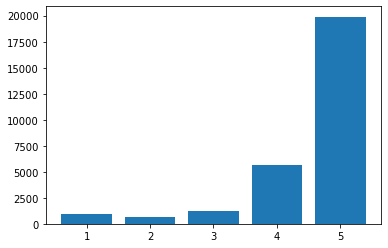

In [4]:
plt.bar(review['reviews.rating'], review['No of Users'], width =0.8, )

In [5]:
permanent = data[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
mpermanent=permanent.dropna()
mpermanent.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang
1,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG
2,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert
3,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson
4,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda


In [6]:
check =  mpermanent[mpermanent["reviews.text"].isnull()]
check

,reviews.rating,reviews.text,reviews.title,reviews.username


### Classifying the data into two classes

class-1 : Positive if the review rating > 3

Class-2 : Negative if the review rating <= 3

In [7]:
# actualrating = mpermanent[(mpermanent['reviews.rating'] == 1) | (mpermanent['reviews.rating'] == 5)]
# actualrating.shape


mpermanent["review"] = mpermanent["reviews.text"]

mpermanent["score"] = mpermanent["reviews.rating"].apply(lambda x: "negative" if x<=3 else "positive")

# Creating a seperate new variable

actualrating = mpermanent[["review", "score"]]
actualrating.shape

(28332, 2)

In [8]:
print(actualrating.head())
print('\n\n')
print(actualrating['review'].head(10))

                                              review     score
0  I order 3 of them and one of the item is bad q...  negative
1  Bulk is always the less expensive way to go fo...  positive
2  Well they are not Duracell but for the price i...  positive
3  Seem to work as well as name brand batteries a...  positive
4  These batteries are very long lasting the pric...  positive



0    I order 3 of them and one of the item is bad q...
1    Bulk is always the less expensive way to go fo...
2    Well they are not Duracell but for the price i...
3    Seem to work as well as name brand batteries a...
4    These batteries are very long lasting the pric...
5    Bought a lot of batteries for Christmas and th...
6    ive not had any problame with these batteries ...
7    Well if you are looking for cheap non-recharge...
8    These do not hold the amount of high power jui...
9    AmazonBasics AA AAA batteries have done well b...
Name: review, dtype: object


In [9]:
y = actualrating['score']
x = actualrating['review'].reset_index()
# X =x[xindex(False)]

In [10]:
print(len(y))
print(len(x))

28332
28332


In [11]:
X = x['review']
print(X)

0        I order 3 of them and one of the item is bad q...
1        Bulk is always the less expensive way to go fo...
2        Well they are not Duracell but for the price i...
3        Seem to work as well as name brand batteries a...
4        These batteries are very long lasting the pric...
                               ...                        
28327    I got 2 of these for my 8 yr old twins. My 11 ...
28328    I bought this for my niece for a Christmas gif...
28329    Very nice for light internet browsing, keeping...
28330    This Tablet does absolutely everything I want!...
28331    At ninety dollars, the expectionations are low...
Name: review, Length: 28332, dtype: object


In [12]:
print(len(X))

28332


### Applying Natural Language Processing Techniques

1. Removal of all Punctuations.
2. Removal of all Stopwords
3. Obtaining the clean data that is free of punctuations and stopwords

Importing essential libraries for NLP and framing a function that is used for text processing to obtain clean text or data

In [13]:
import string
from nltk.corpus import stopwords
# stop=set(stopwords.words('english'))
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

#### Splitting the data into word tokens

In [14]:
tokens = X[0].split()
print(tokens)

['I', 'order', '3', 'of', 'them', 'and', 'one', 'of', 'the', 'item', 'is', 'bad', 'quality.', 'Is', 'missing', 'backup', 'spring', 'so', 'I', 'have', 'to', 'put', 'a', 'pcs', 'of', 'aluminum', 'to', 'make', 'the', 'battery', 'work.']


#### Processing the information using text_process function

In [15]:
print(text_process(X[0]))

['order', '3', 'one', 'item', 'bad', 'quality', 'missing', 'backup', 'spring', 'put', 'pcs', 'aluminum', 'make', 'battery', 'work']


#### Obtained information will be utilized to extract features with ecoding using CountVectorizer library

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [17]:
len(bow_transformer.vocabulary_)

15281

In [18]:
bow_transformer.vocabulary_

{'order': 10814,
 '3': 261,
 'one': 10734,
 'item': 9246,
 'bad': 4818,
 'quality': 11797,
 'missing': 10176,
 'backup': 4810,
 'spring': 13256,
 'put': 11778,
 'pcs': 11070,
 'aluminum': 4413,
 'make': 9900,
 'battery': 4952,
 'work': 15082,
 'Bulk': 1046,
 'always': 4415,
 'less': 9583,
 'expensive': 7487,
 'way': 14871,
 'go': 8215,
 'products': 11635,
 'like': 9655,
 'Well': 3950,
 'Duracell': 1485,
 'price': 11492,
 'happy': 8508,
 'Seem': 3346,
 'well': 14925,
 'name': 10395,
 'brand': 5266,
 'batteries': 4893,
 'much': 10332,
 'better': 5068,
 'long': 9750,
 'lasting': 9498,
 'great': 8354,
 'Bought': 1018,
 'lot': 9797,
 'Christmas': 1177,
 'AmazonBasics': 750,
 'Cell': 1142,
 'good': 8242,
 'havent': 8551,
 'noticed': 10617,
 'difference': 6690,
 'Amazon': 745,
 'Basic': 932,
 'easier': 7076,
 'purchase': 11748,
 'arrive': 4641,
 'house': 8769,
 'hand': 8466,
 'buy': 5425,
 'ive': 9278,
 'problame': 11575,
 'ordered': 10817,
 'past': 11047,
 'pleased': 11281,
 'looking': 9776,

In [19]:
review_24 = X[24]

In [20]:
bow_25 = bow_transformer.transform([review_24])
bow_25

<1x15281 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [21]:
print(bow_25)

  (0, 4893)	1
  (0, 5680)	1
  (0, 8508)	1
  (0, 9491)	1
  (0, 9750)	1


In [22]:
X = bow_transformer.transform(X)

In [23]:
#training the model
from sklearn.model_selection import train_test_split
#using 25% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## **Naive Bayes Classifier**

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [25]:
preds = nb.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
print("Accuracy: ",round(accuracy_score(y_test, preds)*100,3))

[[ 340  345]
 [ 218 6180]]


              precision    recall  f1-score   support

    negative       0.61      0.50      0.55       685
    positive       0.95      0.97      0.96      6398

    accuracy                           0.92      7083
   macro avg       0.78      0.73      0.75      7083
weighted avg       0.91      0.92      0.92      7083

Accuracy:  92.051


## **support vector machine**

In [27]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train) 
predsvm=clf.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predsvm))
print('\n')
print(classification_report(y_test, predsvm))
predsvm=clf.predict(X_test)
print("Accuracy: ",round(accuracy_score(y_test, predsvm)*100,3))

[[ 286  399]
 [  13 6385]]


              precision    recall  f1-score   support

    negative       0.96      0.42      0.58       685
    positive       0.94      1.00      0.97      6398

    accuracy                           0.94      7083
   macro avg       0.95      0.71      0.78      7083
weighted avg       0.94      0.94      0.93      7083

Accuracy:  94.183


## **K-NearestNeighbors (KNN) Classifier**

In [29]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 

KNeighborsClassifier(n_neighbors=3)

In [30]:
predsknn=neigh.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predsknn))
print('\n')
print(classification_report(y_test, predsknn))
print("Accuracy: ",round(accuracy_score(y_test, predsknn)*100,3))

[[ 457  228]
 [  50 6348]]


              precision    recall  f1-score   support

    negative       0.90      0.67      0.77       685
    positive       0.97      0.99      0.98      6398

    accuracy                           0.96      7083
   macro avg       0.93      0.83      0.87      7083
weighted avg       0.96      0.96      0.96      7083

Accuracy:  96.075


## **GradientBoostingClassifier**

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=1, random_state=0)
model.fit(X_train, y_train)
predicted= model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predicted))
print('\n')
print(classification_report(y_test, predicted))
print("Accuracy: ",round(accuracy_score(y_test, predicted)*100,3))

[[   0  685]
 [   0 6398]]




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       685
    positive       0.90      1.00      0.95      6398

    accuracy                           0.90      7083
   macro avg       0.45      0.50      0.47      7083
weighted avg       0.82      0.90      0.86      7083

Accuracy:  90.329


#### Creating Label Attribute Utilizing Binary Classes in Score Attribute  

In [34]:
mpermanent['label'] = ['1' if star == 'positive' else '0' for star in mpermanent['score']];

In [35]:
mpermanent

,reviews.rating,reviews.text,reviews.title,reviews.username,review,score,label
0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,I order 3 of them and one of the item is bad q...,negative,0
1,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,Bulk is always the less expensive way to go fo...,positive,1
2,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,Well they are not Duracell but for the price i...,positive,1
3,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,Seem to work as well as name brand batteries a...,positive,1
4,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,These batteries are very long lasting the pric...,positive,1
...,...,...,...,...,...,...,...
28327,5,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,I got 2 of these for my 8 yr old twins. My 11 ...,positive,1
28328,4,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,fireman21,I bought this for my niece for a Christmas gif...,positive,1
28329,5,"Very nice for light internet browsing, keeping...",You get a lot for the price!,suzannalicious,"Very nice for light internet browsing, keeping...",positive,1
28330,5,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,SandyJ,This Tablet does absolutely everything I want!...,positive,1


In [36]:
mpermanent.tail()

,reviews.rating,reviews.text,reviews.title,reviews.username,review,score,label
28327,5,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,I got 2 of these for my 8 yr old twins. My 11 ...,positive,1
28328,4,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,fireman21,I bought this for my niece for a Christmas gif...,positive,1
28329,5,"Very nice for light internet browsing, keeping...",You get a lot for the price!,suzannalicious,"Very nice for light internet browsing, keeping...",positive,1
28330,5,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,SandyJ,This Tablet does absolutely everything I want!...,positive,1
28331,4,"At ninety dollars, the expectionations are low...",You get what your paying for,Hung,"At ninety dollars, the expectionations are low...",positive,1


In [37]:
reviews = mpermanent['review']
labels = mpermanent['label']

In [38]:
labels.unique()

array(['0', '1'], dtype=object)

In [39]:
print(len(reviews))

28332


In [40]:
print(len(labels))

28332


In [41]:
stop = set(stopwords.words('english'))

In [42]:
def clean_document(doco):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', doco)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([i for i in doco_clean if i not in stop])
#     doco_clean = [spell(word) for word in doco_clean]
#     p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
#     doco_clean = ([spell(k) for k in doco_clean])
    return doco_clean

In [43]:
# Generate a cleaned reviews array from original review texts
review_cleans = [clean_document(doc) for doc in reviews];
sentences = [' '.join(r) for r in review_cleans ]

In [44]:
print(sentences[7])

well looking cheap non rechargeable batteries last quite perfect nothing say


In [45]:
print(reviews[7])

Well if you are looking for cheap non-rechargeable batteries that last quite a while then these are perfect. Nothing more to say.


In [46]:
print(reviews.shape)

(28332,)


In [47]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [48]:
text_sequences = np.array(tokenizer.texts_to_sequences(sentences))
sequence_dict = tokenizer.word_index
word_dict = dict((num, val) for (val, num) in sequence_dict.items())

<ipython-input-48-a92060aceaaf>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  text_sequences = np.array(tokenizer.texts_to_sequences(sentences))


In [49]:
print(text_sequences)

[list([214, 12, 159, 246, 37, 1208, 1267, 2023, 94, 3411, 3779, 150, 23, 17])
 list([416, 97, 127, 121, 89, 201, 15]) list([16, 85, 5, 70]) ...
 list([44, 81, 125, 488, 823, 252, 394, 711, 149, 46, 35, 15, 27, 88, 419, 4, 849, 4, 23, 175, 82, 95, 2879, 1465, 5091, 1989, 47, 1073, 787, 196, 2175, 929, 1398, 5])
 list([3, 250, 84, 91, 112, 313, 87, 434, 1038, 504, 133, 226, 2883, 3754, 82, 886, 32, 320, 84, 91, 3, 127])
 list([6754, 717, 6755, 174, 74, 4, 591, 4, 81, 6, 15, 253, 149, 242, 488, 167, 224, 1729, 811, 177, 54, 1581, 1103, 187, 4, 3, 25, 52, 302, 752])]


In [50]:
print(sequence_dict)

{'great': 1, 'batteries': 2, 'tablet': 3, 'good': 4, 'price': 5, 'use': 6, 'amazon': 7, 'love': 8, 'bought': 9, 'easy': 10, 'kindle': 11, 'one': 12, 'long': 13, 'kids': 14, 'like': 15, 'well': 16, 'work': 17, 'last': 18, 'buy': 19, 'loves': 20, 'fire': 21, 'old': 22, 'battery': 23, 'time': 24, 'would': 25, 'product': 26, 'get': 27, 'year': 28, 'apps': 29, 'games': 30, 'much': 31, 'screen': 32, 'works': 33, 'better': 34, 'books': 35, 'really': 36, 'quality': 37, 'best': 38, 'purchased': 39, 'brand': 40, 'also': 41, 'got': 42, 'far': 43, 'nice': 44, 'name': 45, 'reading': 46, 'read': 47, 'play': 48, 'used': 49, 'perfect': 50, 'value': 51, 'recommend': 52, 'gift': 53, 'device': 54, 'store': 55, 'life': 56, 'son': 57, 'little': 58, 'size': 59, 'new': 60, 'daughter': 61, 'purchase': 62, 'lot': 63, 'need': 64, 'brands': 65, 'using': 66, 'christmas': 67, 'seem': 68, 'deal': 69, 'happy': 70, 'set': 71, 'case': 72, 'many': 73, 'still': 74, 'even': 75, 'ipad': 76, 'first': 77, 'money': 78, 'exce

In [51]:
print(word_dict)

{1: 'great', 2: 'batteries', 3: 'tablet', 4: 'good', 5: 'price', 6: 'use', 7: 'amazon', 8: 'love', 9: 'bought', 10: 'easy', 11: 'kindle', 12: 'one', 13: 'long', 14: 'kids', 15: 'like', 16: 'well', 17: 'work', 18: 'last', 19: 'buy', 20: 'loves', 21: 'fire', 22: 'old', 23: 'battery', 24: 'time', 25: 'would', 26: 'product', 27: 'get', 28: 'year', 29: 'apps', 30: 'games', 31: 'much', 32: 'screen', 33: 'works', 34: 'better', 35: 'books', 36: 'really', 37: 'quality', 38: 'best', 39: 'purchased', 40: 'brand', 41: 'also', 42: 'got', 43: 'far', 44: 'nice', 45: 'name', 46: 'reading', 47: 'read', 48: 'play', 49: 'used', 50: 'perfect', 51: 'value', 52: 'recommend', 53: 'gift', 54: 'device', 55: 'store', 56: 'life', 57: 'son', 58: 'little', 59: 'size', 60: 'new', 61: 'daughter', 62: 'purchase', 63: 'lot', 64: 'need', 65: 'brands', 66: 'using', 67: 'christmas', 68: 'seem', 69: 'deal', 70: 'happy', 71: 'set', 72: 'case', 73: 'many', 74: 'still', 75: 'even', 76: 'ipad', 77: 'first', 78: 'money', 79: '

In [52]:
reviews_encoded = [];
for i,review in enumerate(review_cleans):
    reviews_encoded.append([sequence_dict[x] for x in review]);

(array([ 103.,  997., 1857., 1050., 1723., 1952., 2455., 2299., 1932.,
        1571., 1373., 1105.,  916.,  878.,  719.,  645.,  559.,  520.,
         481.,  418.,  360.,  335.,  342.,  527.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <BarContainer object of 24 artists>)

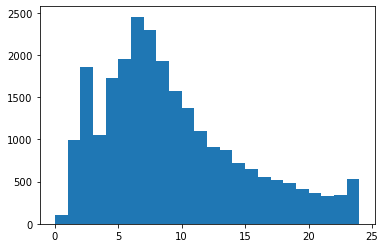

In [53]:
lengths = [len(x) for x in reviews_encoded]
plt.hist(lengths, bins=range(25))

In [54]:
print(reviews_encoded[135])

[93, 43, 1490]


In [55]:
max_cap =8;
X = pad_sequences(reviews_encoded, maxlen=max_cap, truncating='post')

In [56]:
Y = np.array([[0,1] if '0' in label else [1,0] for label in labels])

In [57]:
np.random.seed(1024);
random_posits = np.arange(len(X))
np.random.shuffle(random_posits);

In [58]:
X = X[random_posits];
Y = Y[random_posits];

In [59]:
train_cap = int(0.75 * len(X));
dev_cap = int(0.93 * len(X));

In [60]:
X_train, Y_train = X[:train_cap], Y[:train_cap]
X_dev, Y_dev = X[train_cap:dev_cap], Y[train_cap:dev_cap]
X_test1, Y_test1 = X[dev_cap:], Y[dev_cap:]

## **Customized Neural Network (LSTM) for Classification**

In [61]:
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers.embeddings import Embedding


model1 = Sequential();
model1.add(Embedding(len(word_dict)+1, max_cap, input_length=max_cap));
#adding a LSTM layer of dim 1--
model1.add(LSTM(150, return_sequences=True));
model1.add(LSTM(125, return_sequences=True));
model1.add(LSTM(110, return_sequences=True));
model1.add(LSTM(110, return_sequences=False));
#adding a dense layer with activation function of relu
model1.add(Dense(100, activation='relu', kernel_initializer='uniform'));#best 50,relu
model1.add(Dense(80, activation='relu', kernel_initializer='uniform'));
model1.add(Dense(60, activation='relu', kernel_initializer='uniform'));
model1.add(Dense(40, activation='relu', kernel_initializer='uniform'));
model1.add(Dense(20, activation='relu', kernel_initializer='uniform'));
#adding the final output activation with activation function of softmax
model1.add(Dense(2, activation='sigmoid', kernel_initializer='uniform'));
print(model1.summary());
optimizer = Adam(lr=0.0001, decay=0.0001);

model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# fit model and run it for 20 epochs
history = model1.fit(X_train, Y_train, batch_size=16, epochs=20, validation_data=(X_dev, Y_dev))
# list all data in history
print(history.history.keys())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 8)              79064     
_________________________________________________________________
lstm (LSTM)                  (None, 8, 150)            95400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 8, 125)            138000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 8, 110)            103840    
_________________________________________________________________
lstm_3 (LSTM)                (None, 110)               97240     
_________________________________________________________________
dense (Dense)                (None, 100)               11100     
_________________________________________________________________
dense_1 (Dense)              (None, 80)                8

In [62]:
score = model1.evaluate(X_test1, Y_test1)
print("Test accuracy: %0.4f%%" % (score[1]*100))

62/62 [==============================] - 4s 12ms/step - loss: 0.2299 - accuracy: 0.9370
Test accuracy: 93.6996%


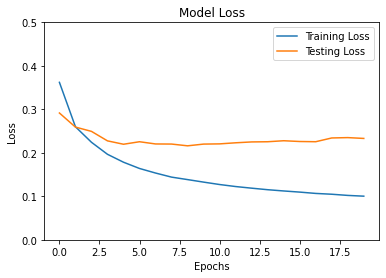

In [63]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylim(0.00, 0.50)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
plt.show()

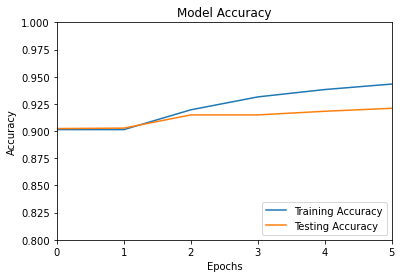

In [64]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylim(0.800,1.000)
plt.xlim(0,5)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='lower right')
plt.show()

In [65]:
score = model1.evaluate(X_test1, Y_test1)
print("Test accuracy: %0.2f%%" % (score[1]*100))

62/62 [==============================] - 1s 13ms/step - loss: 0.2299 - accuracy: 0.9370
Test accuracy: 93.70%
